Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Importing Data 
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


One float value - ERA (Earned Run Average) rest all are int

In [6]:
sum(df.duplicated())

0

No duplicate value present

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

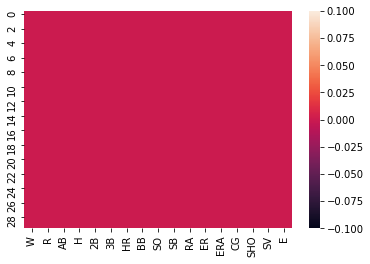

In [9]:
sns.heatmap(df.isnull())

 there are no null values thats good

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Data visualisation

<AxesSubplot:>

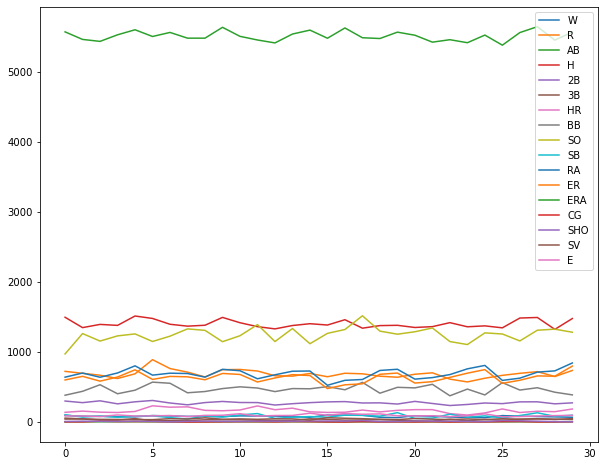

In [11]:
df.plot.line(figsize=(10,8))

AB (at bat) has highest numbers.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

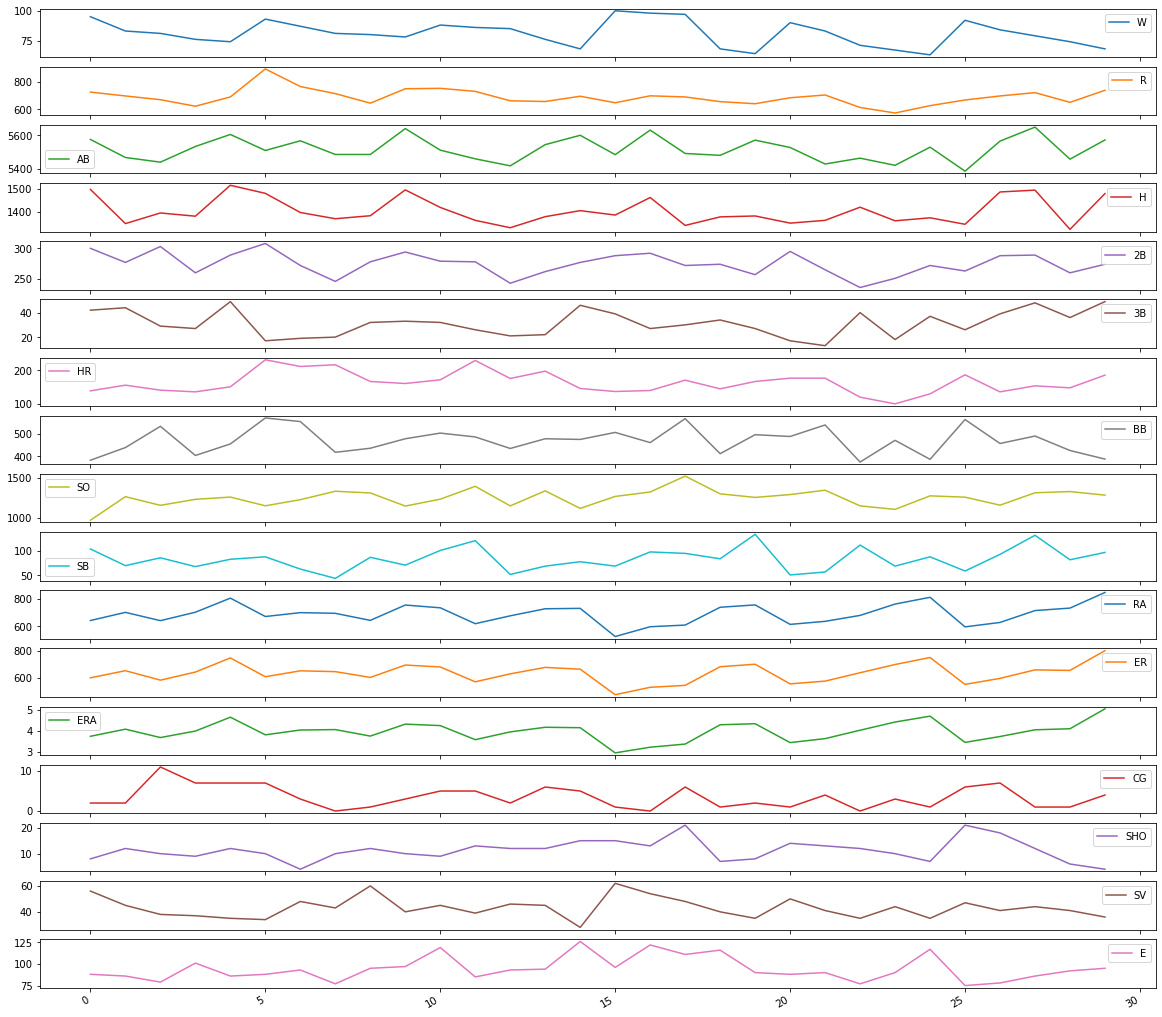

In [12]:
df.plot.line(subplots = True, figsize=(20,20))

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

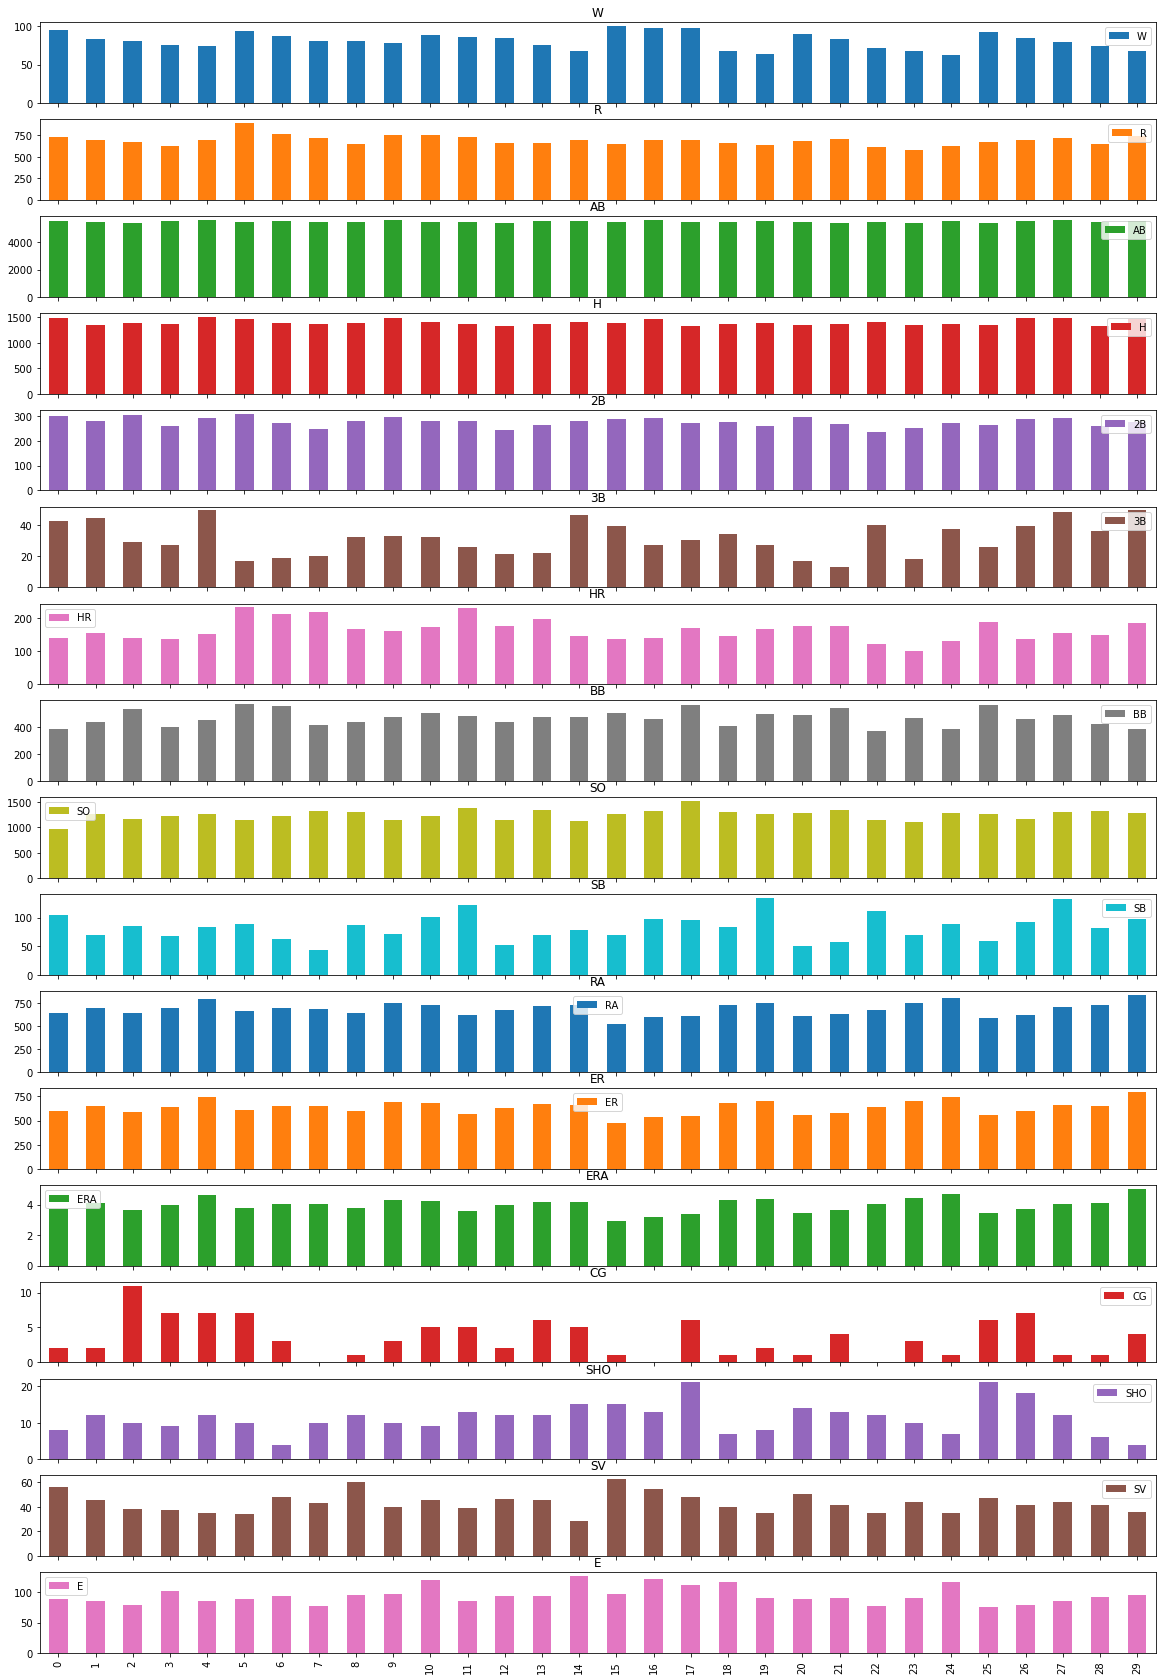

In [13]:
df.plot.bar(subplots= True,stacked= False, figsize=(20,30))

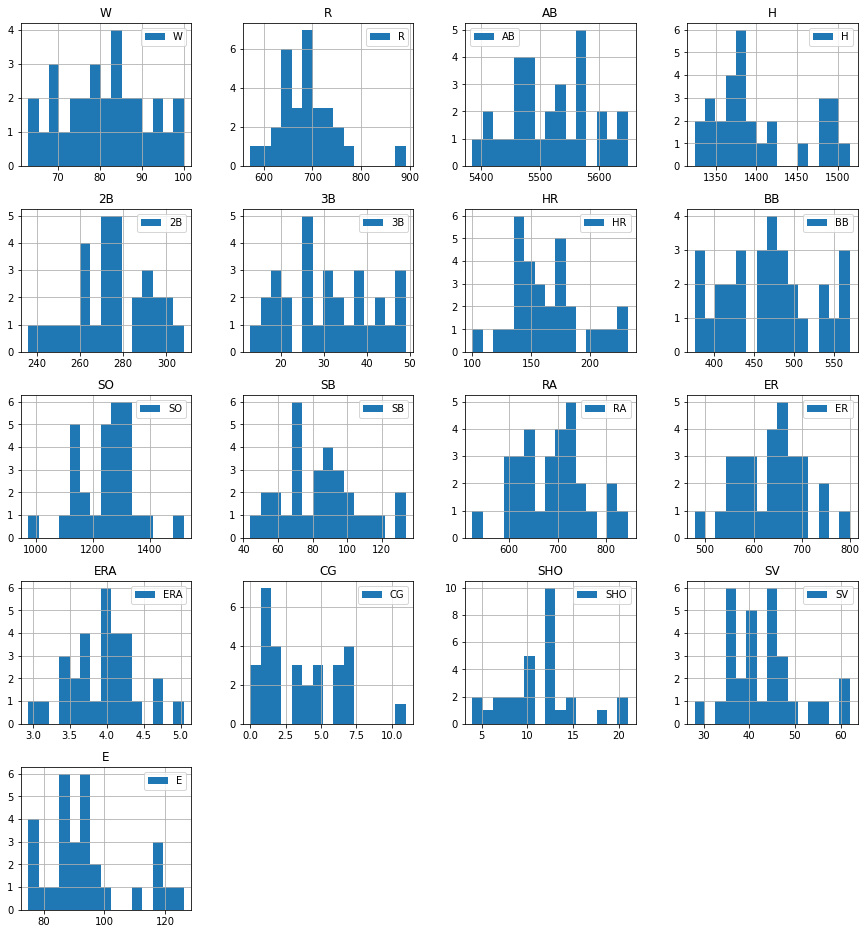

In [15]:
df.hist(figsize=(15,30),layout=(9,4),bins=15,legend=True)
plt.show()

Bivariante analysis

<AxesSubplot:xlabel='W', ylabel='R'>

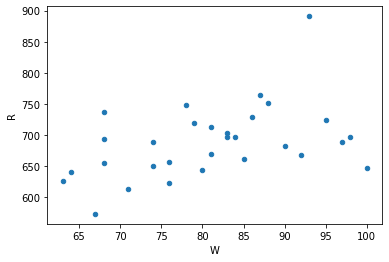

In [16]:
df.plot.scatter(x='W',y='R')

<AxesSubplot:xlabel='W', ylabel='R'>

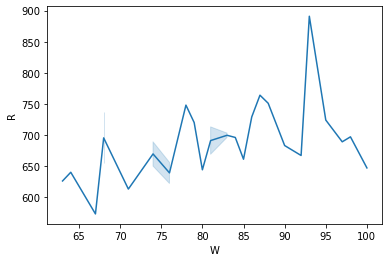

In [18]:
sns.lineplot(x='W',y='R',data=df)

once it scored runs more than 900 which is highest and far from rest Run

<AxesSubplot:xlabel='W', ylabel='R'>

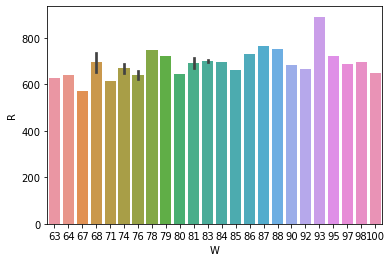

In [19]:
sns.barplot(data=df, x="W", y="R")

<AxesSubplot:xlabel='W', ylabel='R'>

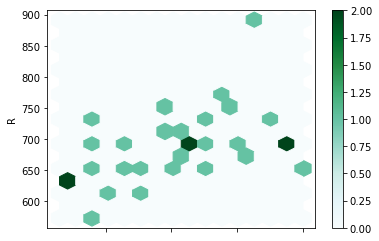

In [20]:
df.plot.hexbin(x='W', y='R', gridsize=15)

<AxesSubplot:xlabel='R', ylabel='AB'>

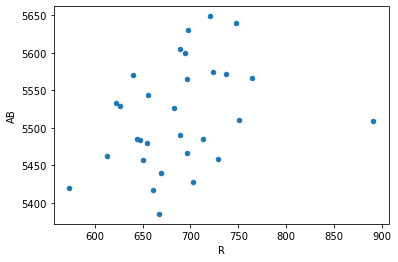

In [22]:
df.plot.scatter(x='R',y='AB')

<AxesSubplot:xlabel='R', ylabel='AB'>

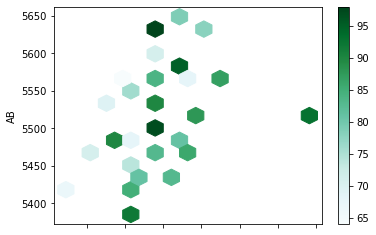

In [27]:
df.plot.hexbin(x='R', y='AB',C="W", gridsize=15)

<AxesSubplot:xlabel='W', ylabel='AB'>

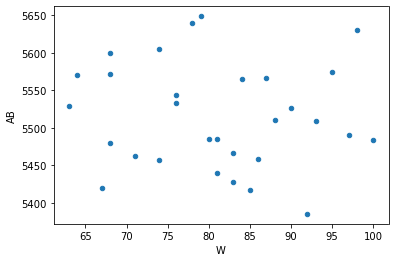

In [28]:
df.plot.scatter(x='W',y='AB')

<AxesSubplot:xlabel='R', ylabel='SO'>

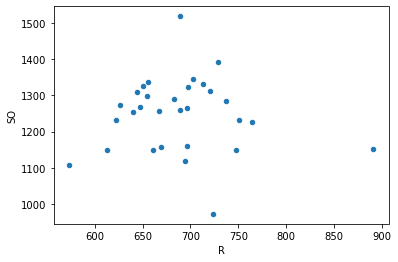

In [29]:
df.plot.scatter(x='R',y='SO')

having least strikeout- wouldn't lead to maximum run
nor having highest srikeout leads to minimum run

### checking for outliers

In [31]:
col=df.columns
col

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, 
                Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

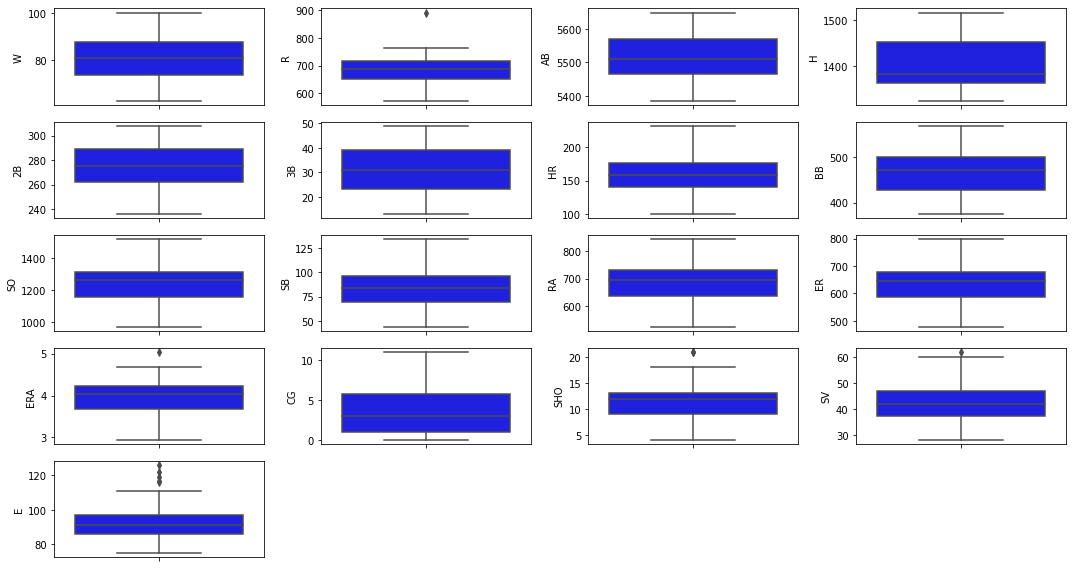

In [34]:
#checking for outliers 
plt.figure(figsize=(15,8))
for i in range(17):
    plt.subplot(5,4,i+1) # note that here i+1 is taken
    sns.boxplot(y=df[col[i]],color='b') # note that here index i is taken
    plt.tight_layout()  #to avoid overlapping

outliers present in R , SHO , E columns

In [36]:
from scipy.stats import zscore
z=zscore(df)
z

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [37]:

dsn= df[(z < 3).all(axis=1)]

In [38]:
dsn.shape

(29, 17)

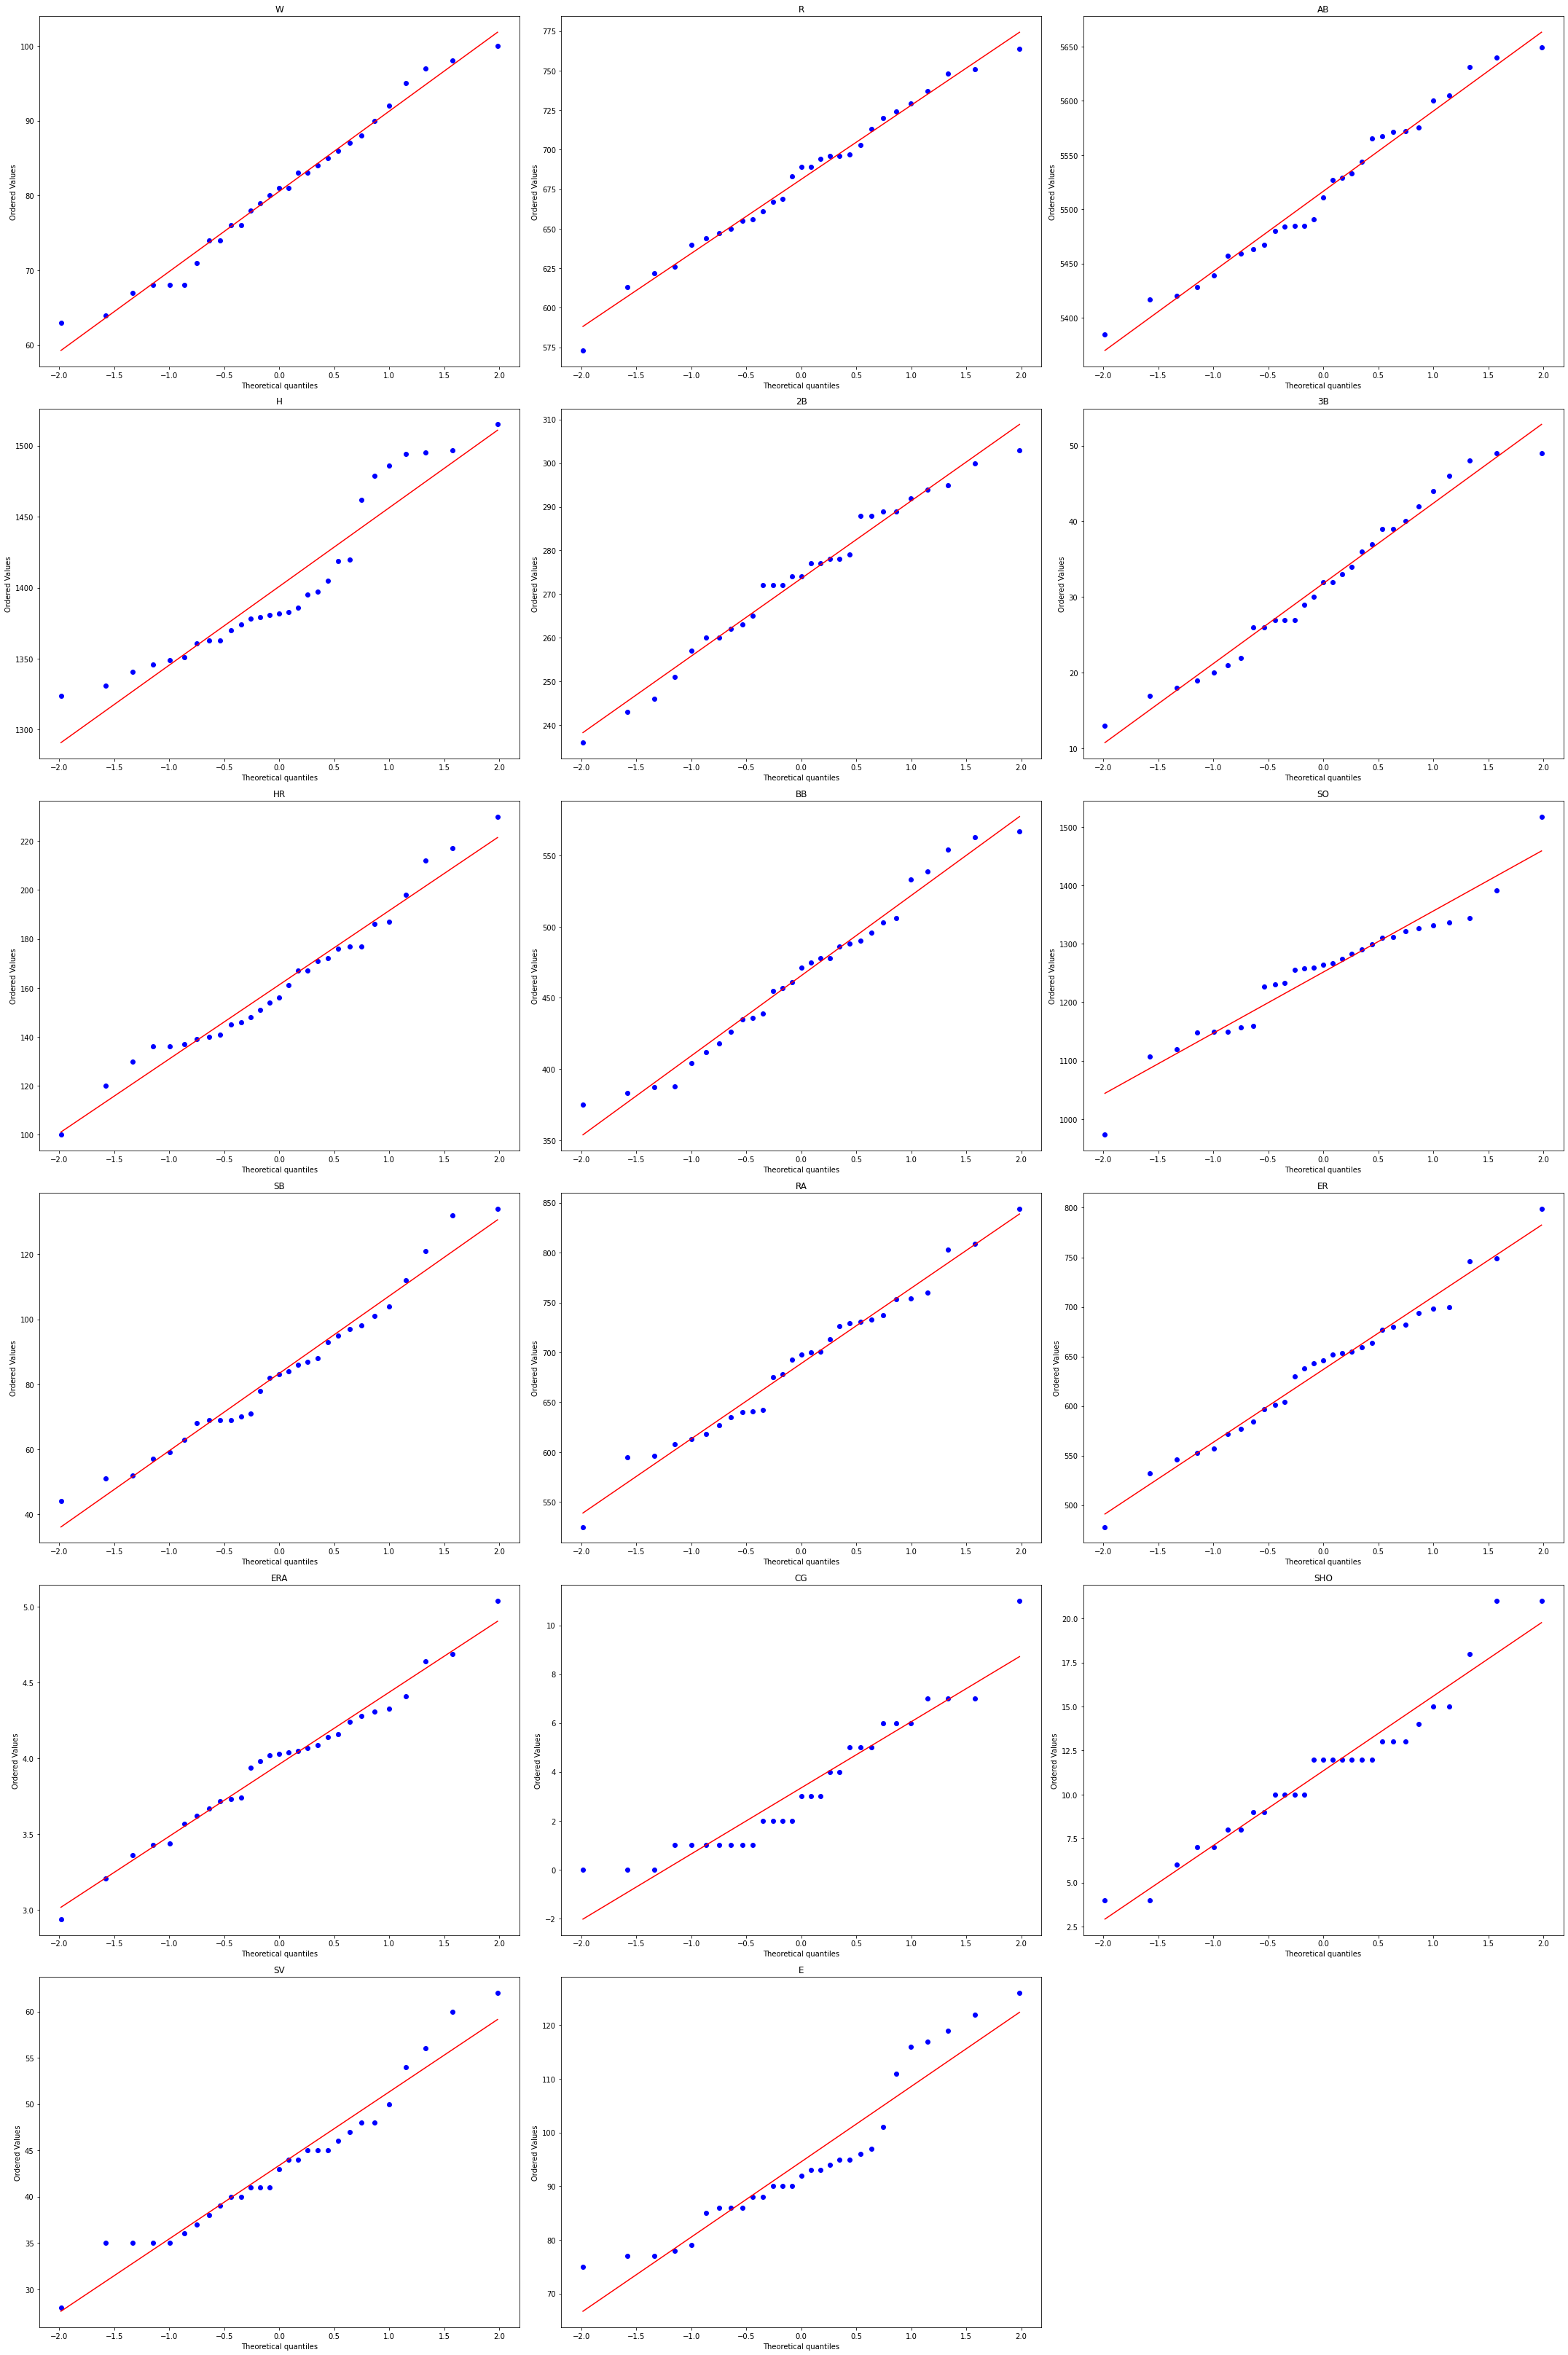

In [39]:
from scipy.stats import probplot
plt.figure(figsize=(30,45))
for i in range(17):
    plt.subplot(6,3,i+1)
    probplot(dsn[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

### checking for Skewness

In [40]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

can see there is some skewness in Run that's because of that unexpected 900

In [50]:
# new data after removing the outliers 
dsn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

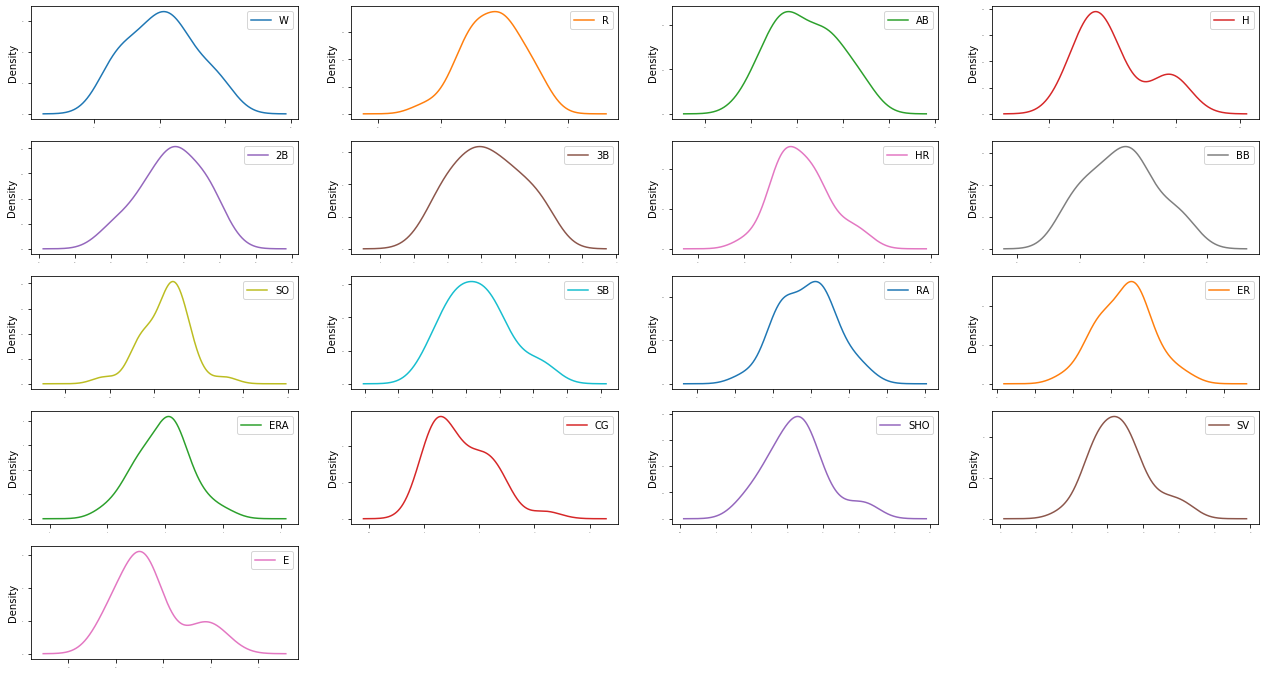

In [42]:
dsn.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

All data are normally distributed

<AxesSubplot:>

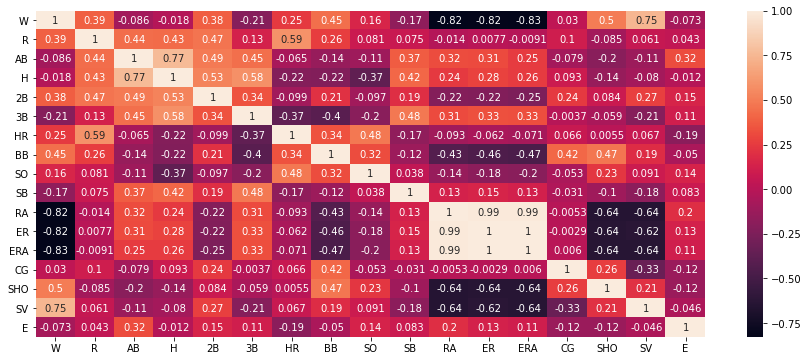

In [43]:
#checking for correlation
plt.figure(figsize=(15,6))
sns.heatmap(dsn.corr(),annot=True)

<AxesSubplot:>

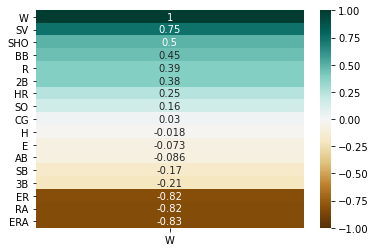

In [44]:
sns.heatmap(dsn.corr()[['W']].sort_values(by='W',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG')

In [47]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for x in dsn.columns:
    dsn[x]=sc.fit_transform(dsn[x].values.reshape(-1,1))

In [48]:

dsn.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.239947,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,0.043934,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-0.446099,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,-0.642112,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [51]:
#Spliting the data

X=dsn.drop('W',axis=1)
y=dsn['W']

### Machine Learning Modeling

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Best score with random state

In [70]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [71]:
model_select(LinearRegression)

Max score is 0.8329254131682358 with random state 62


In [72]:
model_select(ElasticNet)

Max score is 0.5427833356713138 with random state 46


In [73]:
model_select(Ridge)

Max score is 0.9020741688100057 with random state 50


In [74]:
model_select(Ridge)

Max score is 0.9020741688100057 with random state 50


In [75]:
model_select(KNeighborsRegressor)

Max score is 0.7691418968595736 with random state 102


In [76]:
model_select(RandomForestRegressor)

Max score is 0.8390134863123994 with random state 70


In [77]:
model_select(AdaBoostRegressor)

Max score is 0.7958668238784818 with random state 94


In [78]:
model_select(DecisionTreeRegressor)

Max score is 0.7537340619307833 with random state 97


#### Ridge Regression best model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [ ]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('mse ',mean_squared_error(y_test,y_pred))
print('rmse ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

In [ ]:
mse=cross_val_score(r,x,y,scoring='neg_mean_squared_error',cv=7)
print(-mse)
print('mean ',-mse.mean())

lets do some hyperparameter tuning to improve the model accuracy

Now lets train the model with complete data set

In [ ]:
r1.fit(X,y)

Saving the model

In [ ]:
import joblib 
joblib.dump(r1,'baseball.pkl')